<center>
    <h1> INF393 - Máquinas de Aprendizaje  </h1>
    <h2> Tarea 2 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Noviembre 2017_
<p>Profesor: R. Ñanculef</p>
 <p>Ayudante: Francisco Mena</p>
 <p>Integrantes: 
 <br>Alfredo Silva,
 201373511-8</br>
 <br>Fernando Llorens, 201373528-2</br>
 

 
</p>

<h1>1. Tipos de fronteras en Clasificación</h1>
<p>Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.</p>

<p>Este dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:
</p>


In [9]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p>(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada
conjunto y visualícelos</p>

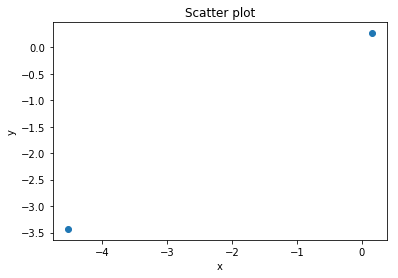

In [36]:
import numpy as np
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)



<p>Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:</p>

In [ ]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    4 plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

<p>(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.
</p>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
visualize_border(model,X,y,"LDA")

<p>(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?
</p>

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)

<p>(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.</p>

In [ ]:
from sklearn.metrics import accuracy_score
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred)))

<p>Para lo que sigue de la actividad se trabajará con una widget interactiva para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.
</p>

In [ ]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

<p>(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.</p>

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = #define your range
p_max = #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

<p>(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.</p>

In [ ]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
#use interactive

<p>(g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.</p>

In [ ]:
#edit the train_model function
model.set_params(C=param,kernel='rbf') #try poly

<p>(h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar
el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profunidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.</p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
model = Tree() #edit the train_model function
model.set_params(max_depth=param,criterion='gini',splitter='best')

<p>(i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.set_params(n_neighbors=param)

<h1>2. Análisis de audios como datos brutos</h1>
<p>Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos diminios de problemas, tales como imágenes, audios, texto.
En esta actividad se trabajará con datos de audios los cuales son directamente extraídos desde datos fuentes
.wav, lo que corresponde a una señal de sonido en diferentes tiempos.
</p>
<p>El dataset se denomina Heartbeat Sounds y es presentado en la plataforma Kaggle a través del siguiente
link. Este dataset consta de grabaciones de sonidos de latidos cardíacos normales y anormales, con distintas
categorías para los latidos anormales.
Para la tarea se trabajará con el dataset A presente en la data, el cual corresponde a datos generados desde
la vía pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido
como latido cardíaco normal o una de las las subcategorías de anormal (Murmur, Extra Heart Sound, Artifact),
por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones
para los sonidos son explicadas en el sitio de Kaggle.
</p>
<p>Para leer y trabajar los archivos de extensión .wav se utilizará el siguiente código:
</p>

In [ ]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
    file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

<p>(a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase</p>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

<p>(b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.</p>

In [ ]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))


<p>(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cu´antos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problem´atica de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?</p>


In [ ]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]


<p>(d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.</p>

In [ ]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

<p>(e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?</p>

In [ ]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

<p>(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.
</p>

In [ ]:
X_fourier = np.abs(np.fft.fft(X))

<p>(g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?</p>


In [ ]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

<p>(h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?</p>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

<p>(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.</p>

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p>(j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.</p>

In [ ]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

<p>(k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango
que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.
</p>

In [ ]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]

<p>(l) Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro
regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.</p>

In [ ]:
Depths = range(1,30)

<p>(m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.</p>

In [ ]:
#Aqui va codigo

<p>(n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el por qué. Visualice apropiadamente la proyección en 2 dimensiones.
</p>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

<p>(o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.
</p>

In [ ]:
#Codigo

<p>(p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos si desea.
</p>

In [ ]:
#Codigo

<h1>3. Análisis de emociones en tweets</h1>
<p>El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (review), en que una persona
manifiesta una opinión, como positiva, negativa o neutral. Esto también ha sido extendido a otros medios,
como lo es analizar la polaridad de textos en redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo, donde el análisis de texto se ha aplicado fuertemente a estos medios sociales. La dificultad de
este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las
personas así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.
</p>
<p>
Para esta actividad se trabajará con un datasets de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde el conjunto de emociones se trabajarán como mutuamente
excluyentes, siendo un problema de múltiples clases.
</p>
<p>
Para aumentar la eficacia de las características extraídas es conveniente ejecutar algunas técnicas de preprocesamiento
básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación
y eliminar palabras sin significado como artículos, pronombres y preposiciones (stop word removal). Otra
técnica que suele ser útil para obtener buenas características (features) es la lematización, es decir la
reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es
el stemming. Varias de éstas están implementadas en la libreria nltk para python.
</p>

<p>(a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros
por clase y describa el dataset.</p>

In [1]:
import pandas as pd
df = pd.read_csv('./text_emotion.csv')
df.head()
df.shape
df.info()
df.describe()
clases=set(df['sentiment'].values)
print(df['content'][0])
print(clases)
print(len(clases))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
set(['love', 'relief', 'neutral', 'anger', 'sadness', 'empty', 'surprise', 'fun', 'enthusiasm', 'happiness', 'hate', 'worry', 'boredom'])
13


<p>(b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para
verificar los resultados de los algoritmos.</p>

In [2]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
df_train.info()
#print(df_train['content'].values[4])
print("Tamaño de entrenamiento: {}".format(len(df_train)))
print("Tamaño de prueba: {}".format(len(df_test)))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32156 entries, 1 to 39999
Data columns (total 4 columns):
tweet_id     32156 non-null int64
sentiment    32156 non-null object
author       32156 non-null object
content      32156 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
Tamaño de entrenamiento: 32156
Tamaño de prueba: 7844


<p>(c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.
</p>

In [3]:
#Se asume que todos los tweets estan en ingles
#Se ocupa Snowball, por que en inglés se comporta mejor que Porter
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer #Se comporta mejor que Porter 
from nltk.tokenize import TweetTokenizer #Tokenizer especializado para twitter

def preprocesamiento(texto):
    try: #En caso de que aparezcan simbolos raros, agregar a la lista
        stoplist = stopwords.words('english')
        listastop=["'",".","#","<",">","}","{","]","[","´","?","¡","!","¿","/","*",
                    '"',"-","--",";",":","::","=",")","(","&","|","'ve","'t","'s",
                   "'ll","n't",">.<","<3","._.","~","<br","</","/>","<<",">>","~~",
                   "...",",","d","na","m","''","´´","!!!!!",'"(','",','.;','[*','tm',
                   '").',"l",'"&',').*','://','www','http','"...',"=[", '@','Thatsï¿½meE']
        nuevostoplist= stoplist+listastop
        '''tokens = nltk.wordpunct_tokenize(texto)
        filtered = [token.decode('utf-8').lower() for token in tokens if token not in nuevostoplist]
        '''
        tknzr = TweetTokenizer()
        tokens = tknzr.tokenize(texto)
        filtered = [token for token in tokens if token not in nuevostoplist]
        stemmed = []
        stemmer = SnowballStemmer("english")
        for word in filtered:
            stemmed.append(stemmer.stem(word))
        return filtered, stemmed
    except:
        print(texto)

#f, stemm = preprocesamiento(df_train['content'].values[2])
#print(f)
#print(stemm)

<p>(d) Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.
</p>

<p>Primero que todo se necesita definir cuales son las emociones humanas, para esto haremos uso de la teoría de las ocho emociones humanas de Robert Plutchik, altamente utilizada en el campo de <i>Sentiment Analysis</i>. Esta teoría dice de manera básica y resumida que existen ocho emociones primarias en distintas intensidades y producto de la fusión de estas nacen ocho emociones secundarias. A continuación se muestra la Rueda de Robert Plutchik para mostrar de manera gráfica las emociones:</p>
<img src="Robert-Plutchik.png"> 

<p>
Ya que se requiere que todas las emociones sean clasificadas en dos clases Terror, Pesar, Aborrecimiento e Ira junto a sus fusiones, serán negativas (-1) en todos sus grados y el resto de las emociones serán clasificadas como positivas (+1). 

Haciendo una revisión del dataset es notable que la cantidad de emociones negativas es mucho menor que las positivas o las neutrales/vacías, por lo que las emociones neutrales y vacías se marcarán como negativas.
</p>
<p>
-De este modo las positivas serán: <i>love, relief, surprise, fun, enthusiasm</i> y <i>happiness.</i>
</p>
<p>
-Mientras que las clases negativas son: <i>neutral, anger, sadness, empty, hate, worry</i> y <i>boredom.</i>
</p>


In [4]:
def codificacion(sentimientos):
    codificados=[]
    for senti in sentimientos:
        if(senti == 'sadness' or senti == 'worry' or senti == 'hate' or senti == 'boredom'):
            codificados.append(-1)
        elif(senti == 'neutral' or senti == 'anger' or senti == 'empty'):
            codificados.append(-1)
        else:
            codificados.append(+1)
    return codificados
cod_train = codificacion(df_train['sentiment'].values)
cod_test = codificacion(df_test['sentiment'].values)

<p>(e) Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets {ti}i=1->n disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets.
</p>
<p>
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text (CountVectorizer
y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento,
para luego transformar el conjunto de pruebas (con el método transform).
</p>

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
training = []
tweets = df_train['content'].values
for t in tweets:
    _,stemm = preprocesamiento(t)
    training.append(' '.join(stemm))

vectorizer = CountVectorizer()
contadores = vectorizer.fit_transform(training)
#print(contadores)
#usar tfid...
transformer = TfidfTransformer()
freqID = transformer.fit_transform(contadores)
#print(freqID)

#Ahora se repite el proceso pero para test
test = []
tweetsT = df_test['content'].values
for t in tweetsT:
    _,stemmT = preprocesamiento(t)
    test.append(' '.join(stemmT))

contadoresT = vectorizer.transform(test)
freqIDT = transformer.transform(contadoresT)

C:\Users\Alfredo\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


<p>
(f) Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria
(por ejemplo: Naive Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles
de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos
(entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.
</p>

In [26]:
#Dos cells diferentes para no entrenar cada vez que se predice, es muy lento
from sklearn import svm
clf = svm.SVC()
clf.fit(freqID,cod_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
predTestSVC = clf.predict(freqIDT)
predTrainSVC = clf.predict(freqID)

In [29]:
from sklearn.metrics import accuracy_score
errorTrainSVC = accuracy_score(predTrainSVC,cod_train)
print("Score de SVC(entrenamiento): "+str(errorTrainSVC))
#errorTrainSVC = 0.596264142665
errorTestSVC = accuracy_score(predTestSVC,cod_test)
print("Score de SVC(test): "+str(errorTestSVC))
#errorTestSVC = 0.58556777462

Score de SVC(entrenamiento): 0.618609279761
Score de SVC(test): 0.613080061193


In [27]:
#Regresión Logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(freqID,cod_train)

predTrainLR = model.predict(freqID)
predTestLR = model.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainLR = accuracy_score(predTrainLR,cod_train)
print("Score de LR(entrenamiento): "+str(errorTrainLR))
#errorTrainLR = 0.793669181878
errorTestLR = accuracy_score(predTestLR,cod_test)
print("Score de LR(test): "+str(errorTestLR))
#errorTestSVC = 0.70239424389

Score de LR(entrenamiento): 0.795839034706
Score de LR(test): 0.735849056604


In [30]:
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(freqID,cod_train)

predTrainDTC = arbol.predict(freqID)
predTestDTC = arbol.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainDTC = accuracy_score(predTrainDTC,cod_train)
print("Score de DTC(entrenamiento): "+str(errorTrainDTC))
#errorTrainDTC = 0.99693165096 OVERFITTING!!!!
errorTestDTC = accuracy_score(predTestDTC,cod_test)
print("Score de DTC(test): "+str(errorTestDTC))
#errorTestDTC = 0.643716660464

Score de DTC(entrenamiento): 0.997263341212
Score de DTC(test): 0.655532891382


In [31]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(freqID, cod_train)

predTrainBNB = BNB.predict(freqID)
predTestBNB = BNB.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainBNB = accuracy_score(predTrainBNB,cod_train)
print("Score de BNB(entrenamiento): "+str(errorTrainBNB))
#errorTrainBNB = 0.836640129369
errorTestBNB = accuracy_score(predTestBNB,cod_test)
print("Score de BNB(test): "+str(errorTestBNB))
#errorTestBNB = 0.704105048445

Score de BNB(entrenamiento): 0.836640129369
Score de BNB(test): 0.704105048445


In [32]:
from sklearn.naive_bayes import MultinomialNB
Mnaive = MultinomialNB()
Mnaive.fit(freqID,cod_train)

predTrainMNB = Mnaive.predict(freqID)
predTestMNB = Mnaive.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainMNB = accuracy_score(predTrainMNB,cod_train)
print("Score de MNB(entrenamiento): "+str(errorTrainMNB))
#errorTrainMNB = 0.789709382438
errorTestMNB = accuracy_score(predTestMNB,cod_test)
print("Score de MNB(test): "+str(errorTestMNB))
#errorTestMNB = 0.674764501735

Score de MNB(entrenamiento): 0.788966289339
Score de MNB(test): 0.682687404386


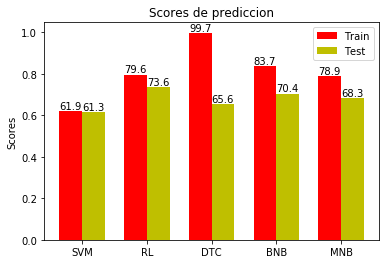

In [34]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestSVC, errorTestLR, errorTestDTC, errorTestBNB, errorTestMNB)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de prediccion')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('SVM', 'RL', 'DTC', 'BNB', 'MNB'))

ax.legend((rects1[0], rects2[0]), ('Train', 'Test'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p>(g) Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?
</p>

In [38]:
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

print("SVM:*******************")
score_the_model(clf, freqID, cod_train, freqIDT, cod_test)
print("RL:*******************")
score_the_model(model, freqID, cod_train, freqIDT, cod_test)
print("DTC:*******************")
score_the_model(arbol, freqID, cod_train, freqIDT, cod_test)
print("BNB:*******************")
score_the_model(BNB, freqID, cod_train, freqIDT, cod_test)
print("MNB:*******************")
score_the_model(Mnaive, freqID, cod_train, freqIDT, cod_test)

SVM:*******************
Training Accuracy: 0.618609
Test Accuracy: 0.613158
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.61      1.00      0.76      4809
          -       0.00      0.00      0.00      3035

avg / total       0.38      0.61      0.47      7844

RL:*******************
Training Accuracy: 0.795839
Test Accuracy: 0.735815
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.86      0.80      4809
          -       0.71      0.54      0.61      3035

avg / total       0.73      0.74      0.73      7844

DTC:*******************
Training Accuracy: 0.997263
Test Accuracy: 0.655616
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      4809
          -       0.56      0.55      0.55      3035

avg / total       0.65      0.66      0.66      7844

BNB:**********

<p>
(h) [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.
</p>

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print sentiment, text

<p>(i) Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.
</p>

In [42]:
def codificacionMultiple(sentimientos):
    lista=['love', 'relief', 'neutral', 'anger',
            'sadness', 'empty', 'surprise', 'fun', 
            'enthusiasm', 'happiness', 'hate', 'worry', 'boredom']
    cn=[]
    for senti in sentimientos:
        n = lista.index(str(senti)) +1
        cn.append(n)
    return cn

def decodificacionMultiple(sentimientos):
    lista=['love', 'relief', 'neutral', 'anger',
            'sadness', 'empty', 'surprise', 'fun', 
            'enthusiasm', 'happiness', 'hate', 'worry', 'boredom']
    cn = []
    for senti in sentimientos:
        n = senti -1
        cn.append(lista[n])
    return cn
mcod_train = codificacionMultiple(df_train['sentiment'].values)
mcod_test = codificacionMultiple(df_test['sentiment'].values)

<p>(j) Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada tweet, muestre sus desempeños a través del error de pruebas en un gráfico resumen.</p>

Score de LR(test): 0.350203977562
Score de DTC(test): 0.268485466599
Score de BNB(test): 0.295257521673


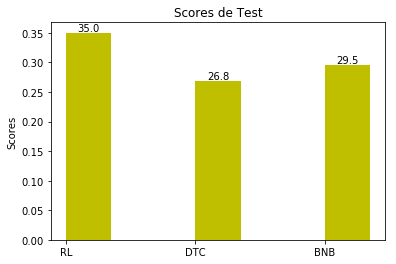

In [52]:
#Inherentemente multicalses
#sklearn.naive_bayes.BernoulliNB
#sklearn.tree.DecisionTreeClassifier
#sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.metrics import accuracy_score

#Regresión Logistica***********************************************
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(freqID,mcod_train)
predTestLR = model.predict(freqIDT)
errorTestLR = accuracy_score(predTestLR,mcod_test)
print("Score de LR(test): "+str(errorTestLR))

#DTC****************************************************************
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(freqID,mcod_train)
predTestDTC = arbol.predict(freqIDT)
errorTestDTC = accuracy_score(predTestDTC,mcod_test)
print("Score de DTC(test): "+str(errorTestDTC))

#BNB****************************************************************
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(freqID, mcod_train)
predTestBNB = BNB.predict(freqIDT)
errorTestBNB = accuracy_score(predTestBNB,mcod_test)
print("Score de BNB(test): "+str(errorTestBNB))


"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 3
#train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestLR, errorTestDTC, errorTestBNB)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de Test')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('RL', 'DTC', 'BNB'))



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

#autolabel(rects1)
autolabel(rects2)

plt.show()

<p>(k) Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest.
</p>

Score de LR-One Vs Rest(test): 0.353263640999
Score de SVC-One Vs One(test): 0.284931157573


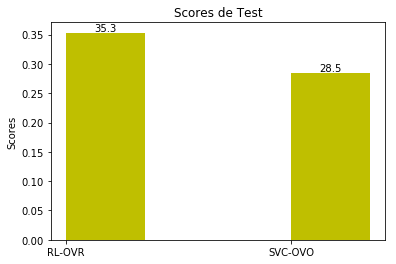

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn import svm
from sklearn.linear_model import LogisticRegression
#sklearn.svm.SVC ONE-VS-ONE
#sklearn.linear_model.LogisticRegression (setting multi_class=”ovr”) ONE-VS-ALL
modelLR = LogisticRegression(multi_class='ovr')
modelLR.fit(freqID, mcod_train)
predTestLR = modelLR.predict(freqIDT)
errorTestLR = accuracy_score(predTestLR,mcod_test)
print("Score de LR-One Vs Rest(test): "+str(errorTestLR))

modelSVC = svm.SVC()
classif = OneVsRestClassifier(modelSVC)
classif.fit(freqID, mcod_train)
predTestSVC_OVO = classif.predict(freqIDT)
errorTestSVC_OVO = accuracy_score(predTestSVC_OVO,mcod_test)
print("Score de SVC-One Vs One(test): "+str(errorTestSVC_OVO))


"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 2
#train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestLR, errorTestSVC_OVO)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de Test')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('RL-OVR', 'SVC-OVO',))



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

#autolabel(rects1)
autolabel(rects2)

plt.show()


<p>(l) Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.</p>

In [55]:
print("LR:*******************")
score_the_model(model, freqID, mcod_train, freqIDT, mcod_test)

print("LR-OVR:*******************")
score_the_model(model, freqID, mcod_train, freqIDT, mcod_test)

LR:*******************
Training Accuracy: 0.548793
Test Accuracy: 0.350249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.48      0.37      0.42       741
          -       0.36      0.03      0.06       322

avg / total       0.33      0.35      0.32      7844

LR-OVR:*******************
Training Accuracy: 0.548793
Test Accuracy: 0.350249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.48      0.37      0.42       741
          -       0.36      0.03      0.06       322

avg / total       0.33      0.35      0.32      7844



C:\Users\Alfredo\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 13, does not match size of target_names, 2
  .format(len(labels), len(target_names))


<p>(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos
mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?
</p>

In [57]:
print("SVC-OVO:*******************")
score_the_model(classif, freqID, mcod_train, freqIDT, mcod_test)

print("DTC:*******************")
score_the_model(arbol, freqID, mcod_train, freqIDT, mcod_test)

print("BNB:*******************")
score_the_model(BNB, freqID, mcod_train, freqIDT, mcod_test)


SVC-OVO:*******************
Training Accuracy: 0.617832
Test Accuracy: 0.284967
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.23      0.62      0.33       741
          -       0.09      0.02      0.03       322

avg / total       0.27      0.28      0.26      7844

DTC:*******************
Training Accuracy: 0.993625
Test Accuracy: 0.268520
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.32      0.31      0.32       741
          -       0.09      0.06      0.07       322

avg / total       0.25      0.27      0.26      7844

BNB:*******************
Training Accuracy: 0.445516
Test Accuracy: 0.295295
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.53      0.06      0.10       741
          -       0.00      0.00      0.00       322

avg / total       0.27      0.30      0.20      7844

